# **Latent Dirichlet Allocations**

## Topic Modelling

### Topic modeling is a method for unsupervised classification of documents, 
### Similar to clustering on numeric data
### Which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.

## LDA 

### 1. Similar to K Means in Clustering
### 2. One of the Most popular Topic Modelling algorithims used.
### 3. The aim of LDA is to **find topics a document belongs to, based on the words in it.**

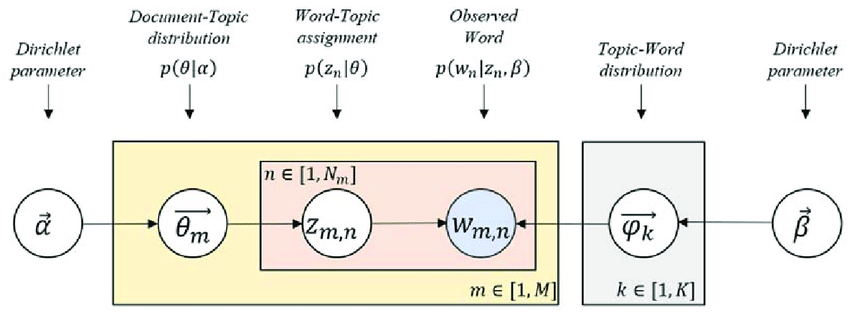

In [52]:
from PIL import Image
Image.open('ldamachine2.png')

## LDA GRAPHICAL MODEL (SCIENTIFIC DIAGRAM)

## Working of LDA 


### **1. The words that belong to a document, that we already know.**
### **2. The words that belong to a topic or the probability of words belonging into a topic, *TO BE CALCULATED***


### Go through each document and randomly assign each word in the document to one of k topics (k is chosen beforehand).
### For each document d, go through each word w and compute :
###     **1. p(topic t | document d): the proportion of words in document d that are assigned to topic t. Tries to capture how many words belong to the topic t for a ### given document d.**
### If a lot of words from d belongs to t, it is more probable that word w belongs to t.
### 
###     **2. p(word w| topic t): the proportion of assignments to topic t over all documents that come from this word w. Tries to capture how many documents are in  topic t because of word w.**


## LDA ALGORITHIM USING **GENSIM & NLTK**
### Gensim is used in unsupervised topic modelling and natural language processing.
### The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

In [157]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gensim in c:\users\jvish\anaconda32\lib\site-packages (4.0.1)



In [55]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install nltk

In [176]:
import wikipedia
import nltk

Mona_Lisa = wikipedia.page("MonaLisa")
Taj_Mahal = wikipedia.page("TajMahal")
Covid = wikipedia.page("Covid-19 Pandemic") 
Data_Science = wikipedia.page("Data Science")

In [251]:
corpus = [Mona_Lisa.content, Taj_Mahal.content, Covid.content, Data_Science.content]
type(corpus)

list

In [56]:
import re
from nltk.stem import WordNetLemmatizer

In [252]:
nltk.download("stopwords")
en_stop = set(nltk.corpus.stopwords.words('english'))

stemmer = WordNetLemmatizer()

def preprocess_text(document):
    #remove special characters
    document = re.sub(r'\W', ' ', str(document))

    #remove all single characters
    document= re.sub(r'\s+[a-zA-Z]\s+', ' ',document)
    
    #multiple spaces to single space
    document= re.sub(r'\s+', ' ',document, flags=re.I)    

    #Remove single characters from start
    document= re.sub(r'\^[a-zA-Z]\s+', ' ',document)

    #convert to lower case
    document= document.lower()

    document = re.sub(r'^b\s+', ' ' , document)

    #lemmatization
    tokens = document.split() 
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [ word for word in tokens if word not in en_stop] 
    tokens = [ word for word in tokens if  len(word) > 5]
    

    return tokens

process_data = []
for doc in corpus:
    tokens = preprocess_text(doc)
    process_data.append(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jvish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
from gensim import corpora
import gensim
input_dict = corpora.Dictionary(process_data)
input_corpus = [input_dict.doc2bow(token, allow_update= True) for token in process_data ]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1), (30, 2), (31, 1), (32, 4), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 2), (44, 2), (45, 1), (46, 3), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 3), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 5), (60, 2), (61, 1), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 3), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 3), (80, 2), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 5), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [256]:
lda_model = gensim.models.ldamodel.LdaModel(input_corpus, num_topics= 4, id2word= input_dict, passes= 20)
lda_model.print_topics(num_words =8)

[(0,
  '0.014*"country" + 0.012*"reported" + 0.011*"pandemic" + 0.010*"people" + 0.010*"outbreak" + 0.008*"number" + 0.008*"health" + 0.008*"million"'),
 (1,
  '0.011*"marble" + 0.011*"garden" + 0.011*"building" + 0.008*"mughal" + 0.007*"complex" + 0.007*"mumtaz" + 0.006*"design" + 0.006*"element"'),
 (2,
  '0.037*"science" + 0.015*"statistic" + 0.006*"technique" + 0.005*"information" + 0.005*"learning" + 0.005*"knowledge" + 0.004*"analysis" + 0.004*"machine"'),
 (3,
  '0.039*"painting" + 0.019*"leonardo" + 0.010*"louvre" + 0.010*"portrait" + 0.007*"century" + 0.006*"french" + 0.006*"museum" + 0.006*"giocondo"')]